In [1]:
import dataset_utils
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from utils import get_training_augmentation
from PIL import Image

In [2]:
LANDCOVER_ROOT = '/root/deepglobe'

In [3]:
basic_aug = get_training_augmentation('basic')
intermedia_aug = get_training_augmentation('intermediate')
advance_aug = get_training_augmentation('advance')

In [4]:
augment_funcs = {
    'basic': basic_aug,
    'intermediate': intermedia_aug,
    'advance_aug': advance_aug
}

In [5]:
train_df, val_df = dataset_utils.get_landcover_train_val_df(LANDCOVER_ROOT, random_state=42)

In [6]:
sample_idx = 10
image_path = train_df['sat_image_path'].loc[sample_idx]
mask_path = train_df['mask_path'].loc[sample_idx]

In [7]:
image = np.array(Image.open(image_path))
mask = np.array(Image.open(mask_path))

In [8]:
test_sample = basic_aug(image=image, mask=mask)
test_aug_image, test_aug_mask = test_sample['image'], test_sample['mask']

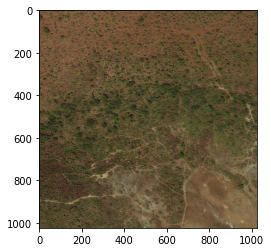

In [9]:
plt.imshow(test_aug_image)

In [10]:
test_sample_idxs = random.sample(range(0, len(train_df)), 4)

In [11]:
sample_dir = './sample_augmentations'
for func_name, augment_func in augment_funcs.items():
    for idx in test_sample_idxs:
        image_path = train_df['sat_image_path'].loc[idx]
        mask_path = train_df['mask_path'].loc[idx]
        
        image = np.array(Image.open(image_path))
        mask = np.array(Image.open(mask_path))
        
        test_sample = augment_func(image=image, mask=mask)
        test_aug_image, test_aug_mask = test_sample['image'], test_sample['mask']
        
        Image.fromarray(test_aug_image).save(os.path.join(sample_dir, f'image_{func_name}_{idx}.jpeg'))
        Image.fromarray(test_aug_mask).save(os.path.join(sample_dir, f'mask_{func_name}_{idx}.jpeg'))